#Redmi Watch - Xiaomi


In [1]:
############################### Mount Google Drive and Authenticate ###############################
print("Mounting Google Drive and Authenticate ...")
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
print("Done")


Mounting Google Drive and Authenticate ...
Mounted at /content/drive
Done


In [2]:
############################### Loading ##################################
print("Loading Data ...")


# plotting different
Thefile="/content/drive/MyDrive/WearablesData/DB/RedmiW/" # for reading db
path="/content/drive/MyDrive/WearablesData/DB/RedmiW/Features/" # Extracted features path

print("Done")



Loading Data ...
Done


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import sqlite3
import json



In [4]:
database_filenames = ['6678634272.db']
tables_dict = {}


for filename in database_filenames:
    try:
        conn = sqlite3.connect(Thefile+filename)

        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        table_names = cursor.fetchall()

        for table_name in table_names:
            table_name = table_name[0]
            query = f"SELECT * FROM {table_name};"
            table_df = pd.read_sql_query(query, conn)
            tables_dict[table_name] = table_df

        conn.close()
    except sqlite3.Error as e:
        print(f"Error while working with {filename}: {e}")



##Functions

In [6]:
import calendar

def plot_variables_for_date(data_frame, timestamp_col, selected_date, variables, log_scale=False):
    # Convert 'TimeStamp' column to datetime format
    data_frame.loc[:, timestamp_col] = pd.to_datetime(data_frame.loc[:, timestamp_col])

    # Check if selected date exists in the dataset
    if selected_date not in data_frame[timestamp_col].dt.date.unique():
        print(f"Selected date '{selected_date}' does not exist in the dataset.")
        return

    # Check if selected variables exist in the dataset
    non_existent_vars = [var for var in variables if var not in data_frame.columns]
    if non_existent_vars:
        print(f"The following variables do not exist in the dataset: {', '.join(non_existent_vars)}")
        return

    # Filter data for the selected date
    selected_data = data_frame[data_frame[timestamp_col].dt.date == selected_date]

    # Set up the plot
    fig, ax = plt.subplots(figsize=(7,5))

    # Define the colors for column bars
    num_variables = len(variables)
    colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_variables))

    # Plot column bars for the selected variables
    for i, variable in enumerate(variables):
        variable_data = selected_data[variable]
        ax.bar(variable, variable_data, align='edge', color=colors[i], width=0.7)

    # Set plot title, x-axis label, and y-axis label
    plt.title(f'{selected_date}', fontsize=12, fontweight='bold', color='black')
    plt.xlabel('Variable', fontsize=10, color='black')
    plt.ylabel('Value', fontsize=10, color='black')

    # Set log scale if requested
    if log_scale:
        ax.set_yscale('log')
        plt.ylabel('Value (Log Scale)', fontsize=10, color='black')

    # Customize the grid appearance
    plt.grid(True, linestyle='--', alpha=0.7)

    # Set the background color
    plt.gca().set_facecolor('#f0f0f0')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the plot
    plt.tight_layout()
    plt.show()
    #plt.savefig(path+ plt.title+'.png')

# def plot_variables_for_date(data_frame, timestamp_col, selected_date, variables, log_scale=False):
#     # Convert 'TimeStamp' column to datetime format
#     data_frame[timestamp_col] = pd.to_datetime(data_frame[timestamp_col])

#     # Check if selected date exists in the dataset
#     if selected_date not in data_frame[timestamp_col].dt.date.unique():
#         print(f"Selected date '{selected_date}' does not exist in the dataset.")
#         return

#     # Check if selected variables exist in the dataset
#     non_existent_vars = [var for var in variables if var not in data_frame.columns]
#     if non_existent_vars:
#         print(f"The following variables do not exist in the dataset: {', '.join(non_existent_vars)}")
#         return

#     # Filter data for the selected date
#     selected_data = data_frame[data_frame[timestamp_col].dt.date == selected_date]

#     # Set up the plot
#     fig, ax = plt.subplots(figsize=(6, 5))

#     # Define the colors for column bars
#     num_variables = len(variables)
#     colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_variables))

    # # Plot column bars for the selected variables
    # for i, variable in enumerate(variables):
    #     variable_data = selected_data[variable]
    #     ax.bar(variable, variable_data, align='edge', color=colors[i], width=0.7)

    # # Set plot title, x-axis label, and y-axis label
    # plt.title(f' {selected_date}', fontsize=12, fontweight='bold', color='black')
    # plt.xlabel('Variable', fontsize=10, color='black')
    # plt.ylabel('Value', fontsize=10, color='black')

    # # Set log scale if requested
    # if log_scale:
    #     ax.set_yscale('log')
    #     plt.ylabel('Value (Log Scale)', fontsize=10, color='black')

    # # Customize the grid appearance
    # plt.grid(True, linestyle='--', alpha=0.7)

    # # Set the background color
    # plt.gca().set_facecolor('#f0f0f0')

    # # Rotate x-axis labels for better visibility
    # plt.xticks(rotation=45)

    # # Remove spines
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)

    # # Show the plot
    # plt.tight_layout()
    # plt.show()
    #plt.savefig(path+ plt.title+'.png')
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct, v=val)
    return my_format

#sleep_day[['time','sleep_light_duration','total_duration','segment_details','sleep_rem_duration','sleep_deep_duration','sleep_awake_duration']]


def plot_sleep_time_distribution_sleep(data, month=None):
    # Set the light background style
    sns.set_style("whitegrid")
    if month:
        if month not in data['Month'].unique():
            print(f"Month {month} doesn't exist in the dataset.")
            return
        data = data[data['Month'] == month]
    #sleep_time_components = data[['DeepSleepTime', 'LightSleepTime', 'SleepDreamTime']].sum()
    #sleep_time_components = data[['sleep_light_duration','sleep_deep_duration']].sum()
    sleep_time_components = data[['sleep_deep_duration','sleep_light_duration','sleep_rem_duration']].sum()
#plot_time_series_sleep(sleep_data, ['sleep_deep_duration','sleep_light_duration','sleep_rem_duration','sleep_awake_duration','sleep_nap_duration'])
    labels = sleep_time_components.index
    sizes = sleep_time_components.values
    plt.figure(figsize=(8, 8))
    colors = ['#4C72B0', '#55A868', '#C44E52']  # Custom color palette for the light theme
    # Add shadow and gradient effect to the pie chart
    pie = plt.pie(sizes, autopct=autopct_format(sizes), startangle=140, colors=colors, textprops={'fontsize': 12})
    plt.setp(pie[0], edgecolor='white', linewidth=1)
    plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
    if month:
        month_name = pd.to_datetime(str(month), format='%m').strftime('%B')
        season = get_season(month)
        #plt.title(f'Distribution of All Sleep Time across Its Components for {month_name} ({season})', fontsize=18, fontweight='bold', color='black')
    #else:
        #plt.title('Distribution of All Sleep Time across Its Components for the Whole Dataset', fontsize=18, fontweight='bold', color='black')
    # Adjust legend style with a shadow effect
    legend = plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 0.8), title='Sleep Components', fontsize=14, title_fontsize=14)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_edgecolor('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def plot_yearly_calendar_heatmap(data, variable):
    sns.set(style='dark')
    # Convert "TimeStamp" column to datetime object
    data['time'] = pd.to_datetime(data['time'])
    data['Year'] = data['time'].dt.year
    data['Month'] = data['time'].dt.month
    # Pivot the data to create a matrix with months as columns, years as rows, and values as the specified variable
    pivot_data = data.pivot_table(values=variable, index='Year', columns='Month', aggfunc='mean')
    # Reindex the pivot table columns to ensure correct ordering
    pivot_data = pivot_data.reindex(columns=range(1, 13))
    # Create a heatmap with Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5, cbar_kws={'label': variable})
    #plt.title(f'Yearly Calendar Heatmap for {variable}', fontsize=18, fontweight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Year', fontsize=14)
    # Set custom x-axis and y-axis labels for months and years
    month_labels = calendar.month_abbr[1:]  # Abbreviated month names (Jan, Feb, Mar, ...)
    year_labels = pivot_data.index.astype(str)
    # Adjust x-axis tick positions by adding half a step
    plt.xticks(ticks=[i + 0.5 for i in range(12)], labels=month_labels, rotation=0, ha='center', fontsize=10)
    plt.yticks(ticks=list(range(len(year_labels))), labels=year_labels, fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_time_series_sleep(data, variables=None):
    # If no specific variables are provided, plot all variables
    if variables is None:
        variables = data.columns[1:]  # Exclude the 'TimeStamp' column
    # Convert 'TimeStamp' column to datetime format
    data['time'] = pd.to_datetime(data['time'])
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    # Set a custom color cycle for better visualization of multiple lines
    color_cycle = plt.cm.tab20c.colors
    # Plot time series for each variable
    for i, variable in enumerate(variables):
        color = color_cycle[i % len(color_cycle)]
        ax.plot(data['time'], data[variable], label=variable, color=color, linewidth=2)
    # Set plot title, x-axis label, and y-axis label
    #plt.title('Time Series for Sleep Variables', fontsize=18, fontweight='bold', color='black')
    plt.xlabel('TimeStamp', fontsize=14, color='black')
    plt.ylabel('Value', fontsize=14, color='black')
    # Move the legend to the right side of the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    # Customize the grid appearance
    plt.grid(True, linestyle='--', alpha=0.7)
    # Set the background color
    plt.gca().set_facecolor('#f0f0f0')
    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Show the plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()

def plot_time_series_sleep2(data, variables=None):
    # If no specific variables are provided, plot all variables
    if variables is None:
        variables = data.columns[1:]  # Exclude the 'TimeStamp' column

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    # Set a custom color cycle for better visualization of multiple lines
    color_cycle = plt.cm.tab20.colors

    # Filter available dates based on available data
    available_dates = data['time']

    # Plot time series for each variable
    for i, variable in enumerate(variables):
        color = color_cycle[i % len(color_cycle)]
        variable_data = data[data['time'].isin(available_dates)][variable]
        ax.plot(available_dates, variable_data, label=variable, color=color, linewidth=2)

        # If only one variable is being plotted, calculate and plot the mean
        if len(variables) == 1:
            variable_mean = variable_data.mean()
            ax.axhline(y=variable_mean, color=color, linestyle='--', label=f'{variable} Mean')

    # Set plot title, x-axis label, and y-axis label
    plt.title('Time Series for Sleep Variables', fontsize=18, fontweight='bold', color='black')
    plt.xlabel('time', fontsize=14, color='black')
    plt.ylabel('Value (minutes)', fontsize=14, color='black')

    # Move the legend to the right side of the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

    # Customize the grid appearance
    plt.grid(True, linestyle='--', alpha=0.7)

    # Set the background color
    plt.gca().set_facecolor('#f0f0f0')

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the plot
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()

    #avg_hr      min_hr           max_hr
def plot_rate_trends(data_frame, plot_max=True, plot_min=True, plot_avg=True):
    sns.set(style="whitegrid")
    # Sort the DataFrame by timestamp
    data_frame = data_frame.sort_values(by='time')
    plt.figure(figsize=(10, 6))
    if plot_max:
        plt.plot(data_frame['time'], data_frame['max_hr'], label='MaxRate', color='red', linewidth=2)
    if plot_min:
        plt.plot(data_frame['time'], data_frame['min_hr'], label='MinRate', color='blue', linewidth=2)
    if plot_avg:
        plt.plot(data_frame['time'], data_frame['avg_hr'], label='AverageRestRate', color='green', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Rate')
    #plt.title('Rate Trends Over Time')
    if plot_max and plot_avg:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    else:
        plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.7)
    ax = plt.gca()
    ax.set_facecolor('#F5F5F5')
    sns.despine()
    plt.show()

def heart_colored_scatter_plot(data_frame, x_column, y_columns, colors, title, x_label, y_label, legend_labels):
    plt.figure(figsize=(10, 6))
    for y_column, color, legend_label in zip(y_columns, colors, legend_labels):
        plt.scatter(data_frame[x_column], data_frame[y_column], color=color, label=legend_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placing legend on the side
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_box_plots_heart(data_frame, plot_max=True, plot_min=False, plot_avg=True):
    sns.set(style="whitegrid")
    box_plot_data = []
    # Create a dictionary to map column names to their labels
    column_labels = {
        'max_hr': 'Max Rate',
        'min_hr': 'Min Rate',
        'avg_hr': 'Average Rest Rate'
    }
    if plot_max:
        box_plot_data.append(data_frame['max_hr'])
    if plot_min:
        box_plot_data.append(data_frame['min_hr'])
    if plot_avg:
        box_plot_data.append(data_frame['avg_hr'])
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=box_plot_data)
    plt.ylabel('Rate')
    plt.title('Rate Distribution - Box Plot')
    # Set x-axis tick labels using the column labels dictionary
    plt.xticks(range(len(box_plot_data)), [column_labels[column] for column in data_frame.columns if column in column_labels], rotation=0)
    plt.tight_layout()
    plt.show()




def plot_time_series_activity(data_frame, plot_total_steps=True, plot_total_calories=True, log_scale=False):
    plt.figure(figsize=(10, 6))
    if plot_total_steps:
        plt.plot(data_frame['time'], data_frame['steps'], label='TotalSteps', marker='o',color='green')
    if plot_total_calories:
        plt.plot(data_frame['time'], data_frame['calories'], label='TotalCalories', marker='o',color='blue')
    plt.xlabel('Time')
    plt.ylabel('Value')
    #plt.title('TotalSteps and TotalCalories Over Time')
    plt.legend()
    plt.xticks(rotation=90)
    if log_scale:
        plt.yscale('log')  # Set y-axis to log scale
    plt.tight_layout()
    plt.show()

def plot_scatter_with_regression(data_frame, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.set_palette("pastel")  # Set a pastel color palette
    # Scatter Plot with Regression Line
    sns.regplot(x=x_column, y=y_column, data=data_frame, scatter_kws={'color': '#000080'}, line_kws={'color': 'salmon'})
    plt.xlabel("TotalSteps")
    plt.ylabel("TotalCalories")
    plt.title(f'{x_column} vs {y_column}')
    plt.tight_layout()
    # Calculate the correlation coefficient
    correlation = data_frame[x_column].corr(data_frame[y_column])
    correlation_text = f'Correlation: {correlation:.2f}'
    # Display correlation coefficient on the plot
    plt.annotate(correlation_text, xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='black')

    # Remove grid
    plt.grid(False)
    plt.show()




#TABLES

In [7]:
tables_dict.keys()

dict_keys(['steps', 'intensity', 'calories', 'heart_rate', 'energy', 'stress', 'spo2', 'valid_stand', 'ecg', 'weight', 'blood_pressure', 'menstruation', 'menstrual_symptoms', 'watch_night_sleep', 'watch_daytime_sleep', 'sleep', 'vo2_max', 'pai', 'headset', 'noise', 'dynamic', 'snail_snore', 'training_load', 'temperature', 'running_ability_index', 'vitality', 'steps_day', 'calories_day', 'sleep_day', 'heart_rate_day', 'stress_day', 'spo2_day', 'intensity_day', 'valid_stand_day', 'energy_day', 'goal_day', 'red_dot_day', 'temperature_local_day', 'fitness_summary_helper', 'MIWDBSportTable', 'MIWDBSportSummaryTable', 'sleep_hr_Spo2_binary', 'sleep_incomplete', 'sleep_original_data'])

#Sleep

In [8]:
sleep_day=tables_dict["sleep_day"]
sleep_day = sleep_day[["time","value"]]
sleep_day['sleep_light_duration'] = sleep_day['value'].apply(lambda x: json.loads(x).get('sleep_light_duration'))
sleep_day['total_duration'] = sleep_day['value'].apply(lambda x: json.loads(x).get('total_duration'))
sleep_day['segment_details'] = sleep_day['value'].apply(lambda x: json.loads(x).get('segment_details'))
sleep_day['segment_details'] = sleep_day['value'].apply(lambda x: json.loads(x).get('segment_details'))
sleep_day['segment_details'] = sleep_day['segment_details'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
sleep_day['max_hr'] = sleep_day['segment_details'].astype(str).apply(lambda x: eval(x).get('max_hr'))
sleep_day['min_hr'] = sleep_day['segment_details'].astype(str).apply(lambda x: eval(x).get('min_hr'))
sleep_day['avg_hr'] = sleep_day['segment_details'].astype(str).apply(lambda x: eval(x).get('avg_hr'))
sleep_day['sleep_rem_duration'] = sleep_day['segment_details'].astype(str).apply(lambda x: eval(x).get('sleep_rem_duration'))
sleep_day['sleep_deep_duration'] = sleep_day['segment_details'].astype(str).apply(lambda x: eval(x).get('sleep_deep_duration'))
sleep_day['sleep_awake_duration'] = sleep_day['segment_details'].astype(str).apply(lambda x: eval(x).get('sleep_awake_duration'))
#sleep_day['sleep_nap_duration'] = sleep_day['segment_details'].astype(str).apply(lambda x: eval(x).get('sleep_nap_duration')) # added Round 2
sleep_day['sleep_nap_duration'] = sleep_day['value'].apply(lambda x: json.loads(x).get('sleep_nap_duration'))

sleep_day = sleep_day.drop(columns=['value'])
sleep_day['time'] = pd.to_datetime(sleep_day['time'], unit='s')
sleep_day['time'] = pd.to_datetime(sleep_day['time'])
sleep_day['time'] = sleep_day['time'].dt.strftime('%Y-%m-%d')


<ipython-input-8-cc2376134350>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_day['sleep_light_duration'] = sleep_day['value'].apply(lambda x: json.loads(x).get('sleep_light_duration'))
<ipython-input-8-cc2376134350>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_day['total_duration'] = sleep_day['value'].apply(lambda x: json.loads(x).get('total_duration'))
<ipython-input-8-cc2376134350>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [9]:
print(sleep_day.head())
sleep_data = sleep_day[['time','sleep_light_duration','sleep_nap_duration','total_duration','segment_details','sleep_rem_duration','sleep_deep_duration','sleep_awake_duration']]
sleep_data

         time  sleep_light_duration  total_duration  \
0  2023-09-04                   311             397   
1  2023-09-05                   467             615   
2  2023-09-06                   280             363   
3  2023-09-07                     0              76   
4  2023-09-08                   396             507   

                                     segment_details  max_hr  min_hr  avg_hr  \
0  {'max_hr': 94, 'min_hr': 54, 'avg_hr': 61, 'sl...      94      54      61   
1  {'max_hr': 96, 'min_hr': 57, 'avg_hr': 66, 'sl...      96      57      66   
2  {'max_hr': 71, 'min_hr': 60, 'avg_hr': 64, 'sl...      71      60      64   
3  {'max_hr': 88, 'min_hr': 67, 'avg_hr': 75, 'sl...      88      67      75   
4  {'max_hr': 80, 'min_hr': 55, 'avg_hr': 60, 'sl...      80      55      60   

   sleep_rem_duration  sleep_deep_duration  sleep_awake_duration  \
0                   0                   86                    15   
1                   0                  148          

,time,sleep_light_duration,sleep_nap_duration,total_duration,segment_details,sleep_rem_duration,sleep_deep_duration,sleep_awake_duration
0,2023-09-04,311,0,397,"{'max_hr': 94, 'min_hr': 54, 'avg_hr': 61, 'sl...",0,86,15
1,2023-09-05,467,0,615,"{'max_hr': 96, 'min_hr': 57, 'avg_hr': 66, 'sl...",0,148,0
2,2023-09-06,280,0,363,"{'max_hr': 71, 'min_hr': 60, 'avg_hr': 64, 'sl...",0,83,0
3,2023-09-07,0,76,76,"{'max_hr': 88, 'min_hr': 67, 'avg_hr': 75, 'sl...",0,0,0
4,2023-09-08,396,0,507,"{'max_hr': 80, 'min_hr': 55, 'avg_hr': 60, 'sl...",0,111,0
5,2023-09-09,384,0,502,"{'max_hr': 80, 'min_hr': 54, 'avg_hr': 59, 'sl...",0,118,0
6,2023-09-10,359,0,452,"{'max_hr': 83, 'min_hr': 51, 'avg_hr': 58, 'sl...",0,93,0
7,2023-09-11,354,0,467,"{'max_hr': 104, 'min_hr': 46, 'avg_hr': 62, 's...",0,113,33
8,2023-09-12,270,0,346,"{'max_hr': 90, 'min_hr': 52, 'avg_hr': 59, 'sl...",0,76,0
9,2023-09-13,347,0,438,"{'max_hr': 82, 'min_hr': 49, 'avg_hr': 60, 'sl...",0,91,3


##Exporting

In [10]:
# Export data as CSV
f="Sleep"

csv_filename = path + f +"_data.csv"
sleep_data.to_csv(csv_filename, index=False)
print(f"Exported {f} data to {csv_filename}")

Exported Sleep data to /content/drive/MyDrive/WearablesData/DB/RedmiW/Features/Sleep_data.csv


##Plotting

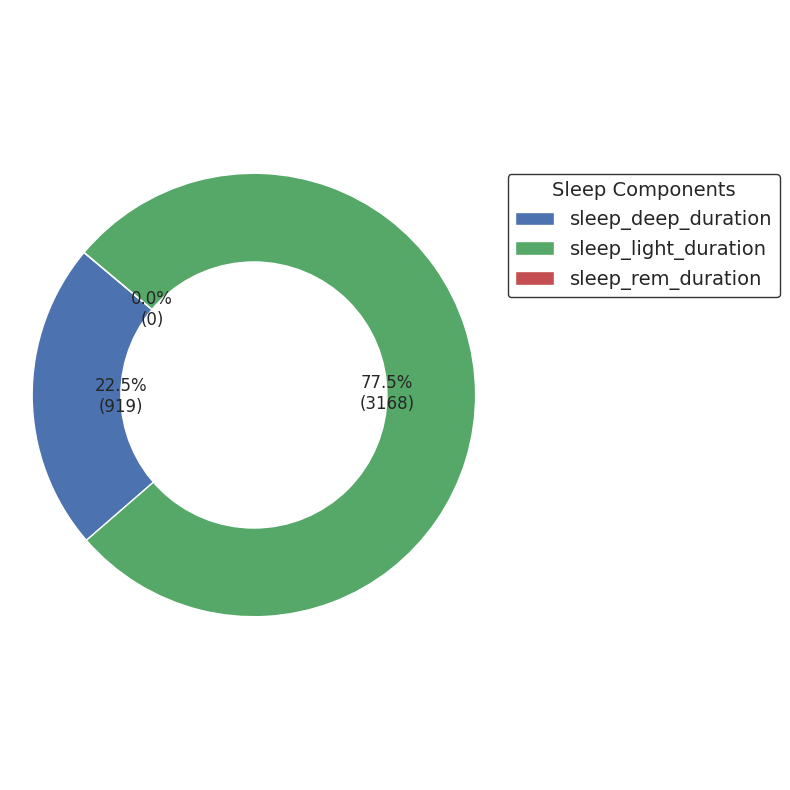

In [11]:
# Plot for the whole dataset
plot_sleep_time_distribution_sleep(sleep_data)

<ipython-input-6-f8457e6bc437>:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'])
<ipython-input-6-f8457e6bc437>:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['time'].dt.year
<ipython-input-6-f8457e6bc437>:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

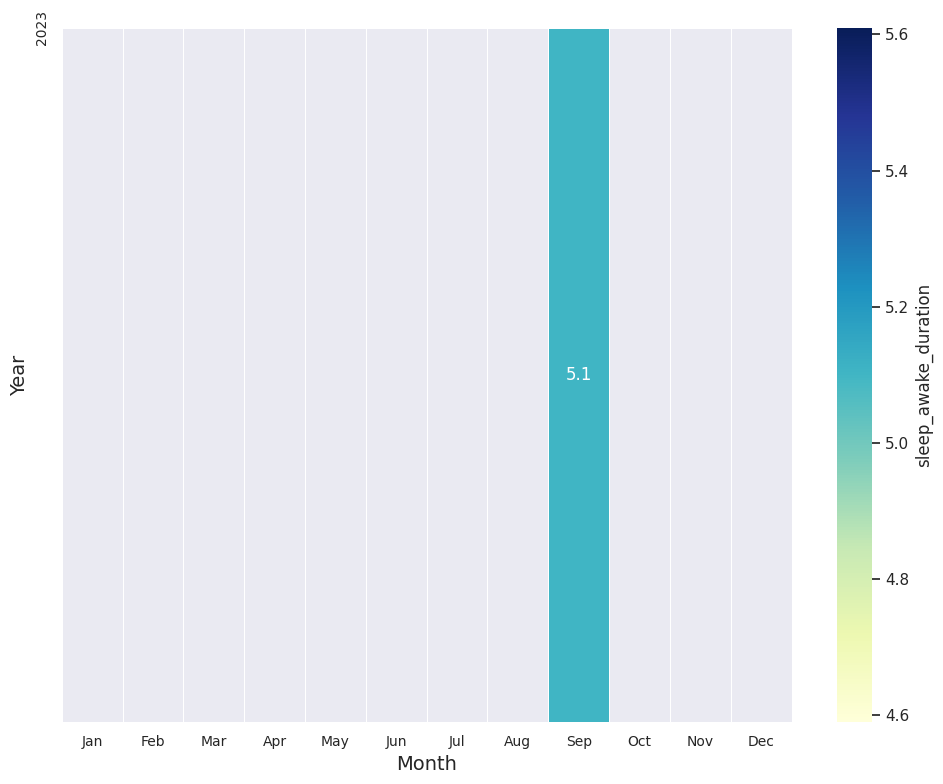

In [12]:
plot_yearly_calendar_heatmap(sleep_data, 'sleep_awake_duration')


<ipython-input-6-f8457e6bc437>:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'])


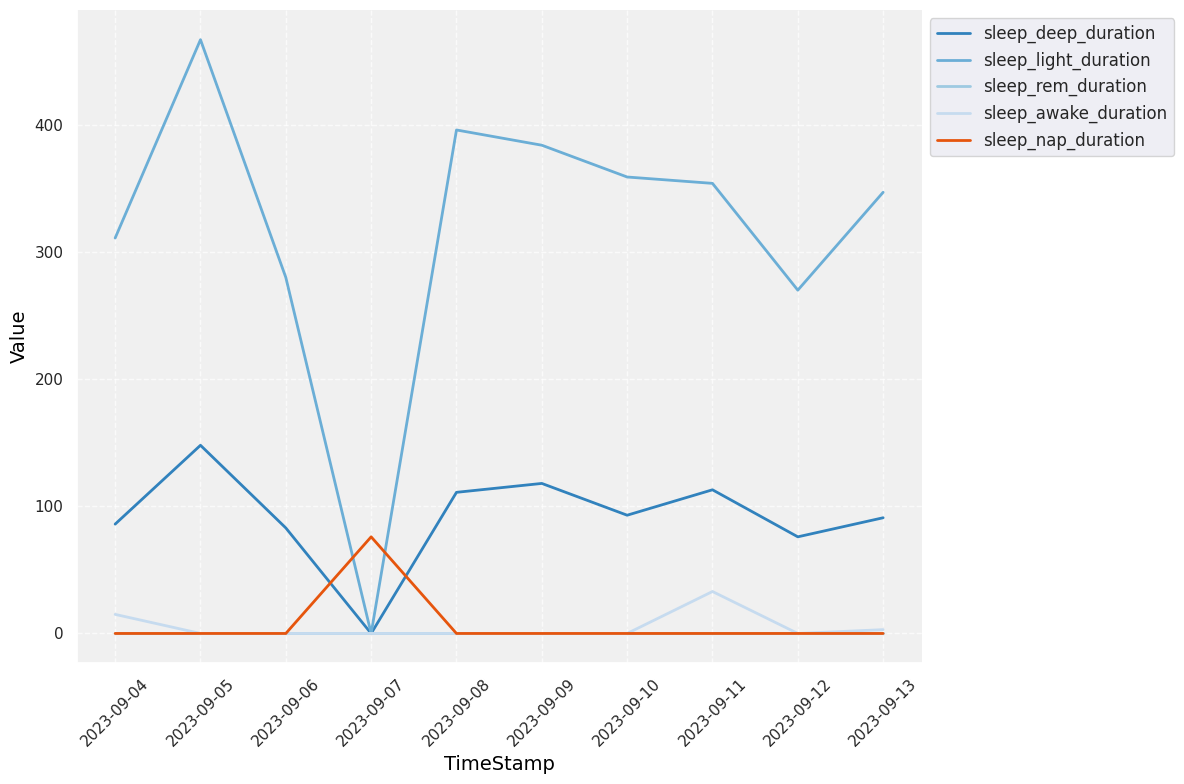

In [13]:
#sleep_data = sleep_day[['time','sleep_light_duration','total_duration','segment_details','sleep_rem_duration','sleep_deep_duration','sleep_awake_duration']]

plot_time_series_sleep(sleep_data, ['sleep_deep_duration','sleep_light_duration','sleep_rem_duration','sleep_awake_duration','sleep_nap_duration'])

<ipython-input-6-f8457e6bc437>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame.loc[:, timestamp_col] = pd.to_datetime(data_frame.loc[:, timestamp_col])
<ipython-input-6-f8457e6bc437>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_frame.loc[:, timestamp_col] = pd.to_datetime(data_frame.loc[:, timestamp_col])


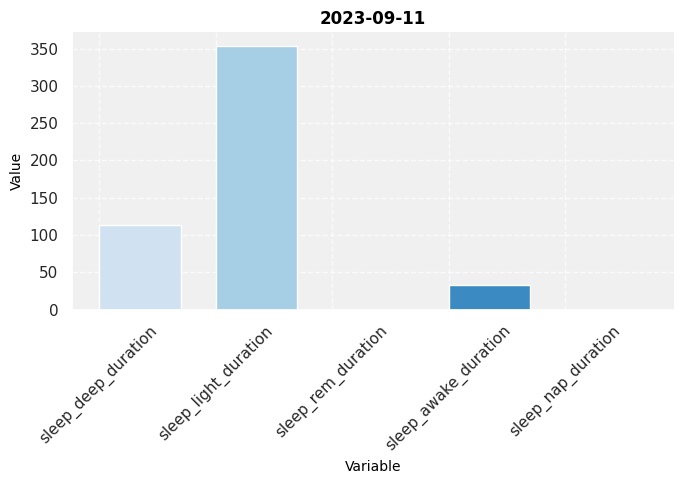

In [14]:
import numpy as np

selected_date = pd.to_datetime('2023-09-11').date()  # Replace with the date you want to plot
#variables_to_plot = ['sleep_deep_duration','sleep_light_duration','sleep_rem_duration','sleep_awake_duration','sleep_nap_duration'] # Replace with the vars you want to plot
variables_to_plot=['sleep_deep_duration','sleep_light_duration','sleep_rem_duration','sleep_awake_duration','sleep_nap_duration']

plot_variables_for_date(sleep_data, timestamp_col='time', selected_date=selected_date, variables=variables_to_plot, log_scale=False)




NameError: name 'colors' is not defined

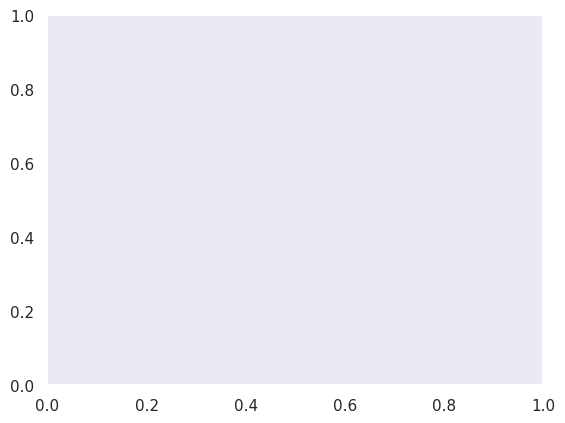

In [16]:
total_light_duration = sleep_data['sleep_light_duration'].sum()
total_rem_duration = sleep_data['sleep_rem_duration'].sum()
total_deep_duration = sleep_data['sleep_deep_duration'].sum()
total_awake_duration = sleep_data['sleep_awake_duration'].sum()

total_durations = [total_light_duration, total_rem_duration, total_deep_duration, total_awake_duration]
labels = ['Light Sleep', 'REM Sleep', 'Deep Sleep', 'Awake']

#colors = ['#66b3ff', '#ffcc99', '#c2c2f0', '#ffb3e6']

fig, ax = plt.subplots()
ax.pie(total_durations, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')

plt.legend(labels, loc='best', bbox_to_anchor=(0.9, 0.8))

#plt.title('Sleep Distribution')

plt.show()


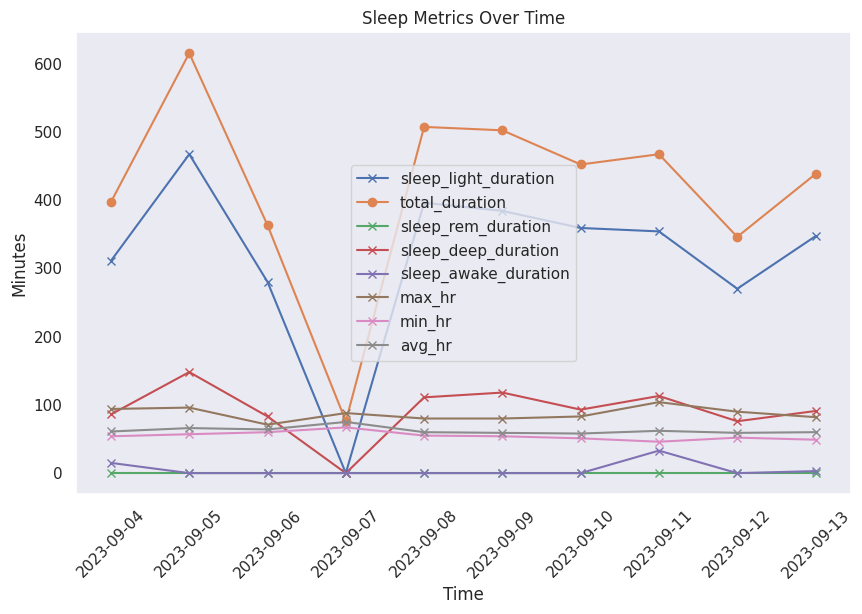

In [18]:
sleep_day['time'] = pd.to_datetime(sleep_day['time'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sleep_day['time'], sleep_day['sleep_light_duration'], label='sleep_light_duration', marker='x')
ax.plot(sleep_day['time'], sleep_day['total_duration'], label='total_duration', marker='o')
ax.plot(sleep_day['time'], sleep_day['sleep_rem_duration'], label='sleep_rem_duration', marker='x')
ax.plot(sleep_day['time'], sleep_day['sleep_deep_duration'], label='sleep_deep_duration', marker='x')
ax.plot(sleep_day['time'], sleep_day['sleep_awake_duration'], label='sleep_awake_duration', marker='x')
ax.plot(sleep_day['time'], sleep_day['max_hr'], label='max_hr', marker='x')
ax.plot(sleep_day['time'], sleep_day['min_hr'], label='min_hr', marker='x')
ax.plot(sleep_day['time'], sleep_day['avg_hr'], label='avg_hr', marker='x')
ax.set_xlabel('Time')
ax.set_ylabel('Minutes')
ax.set_title('Sleep Metrics Over Time')
plt.xticks(rotation=45)
ax.legend()
plt.show()


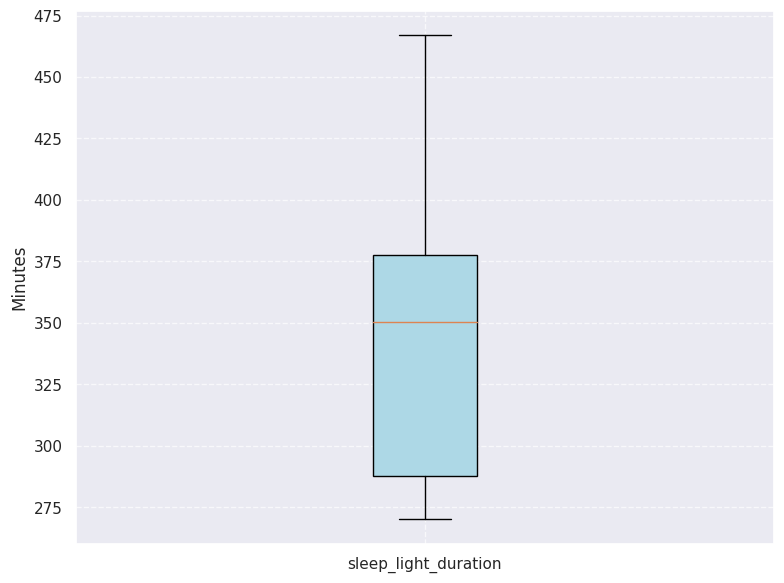

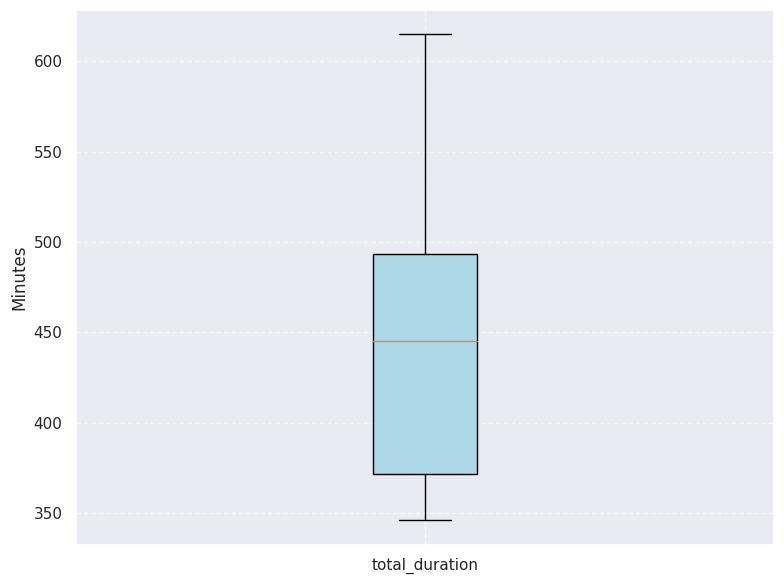

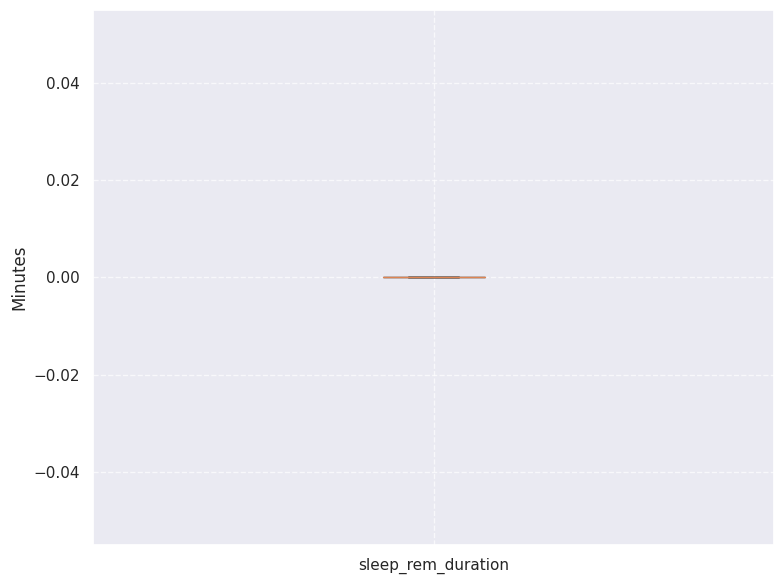

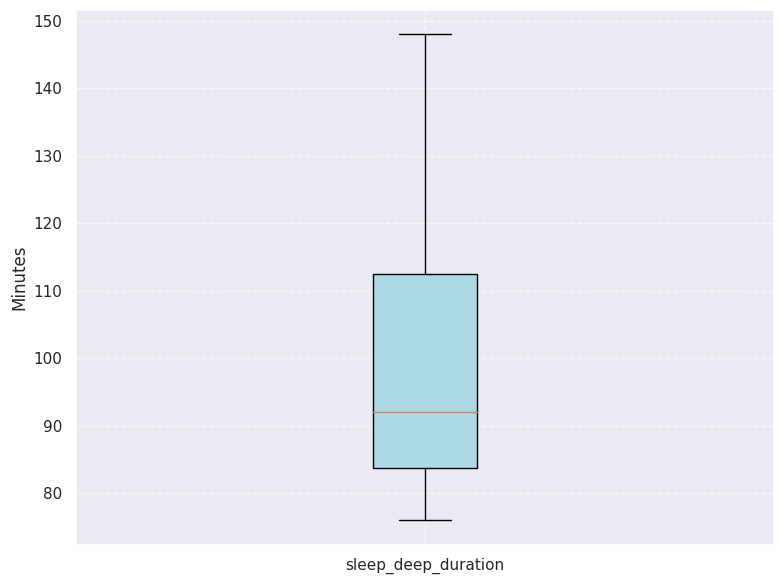

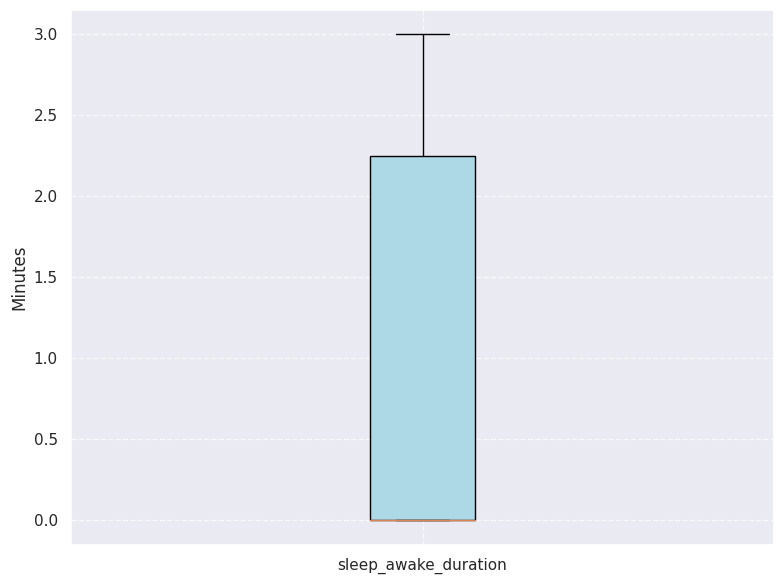

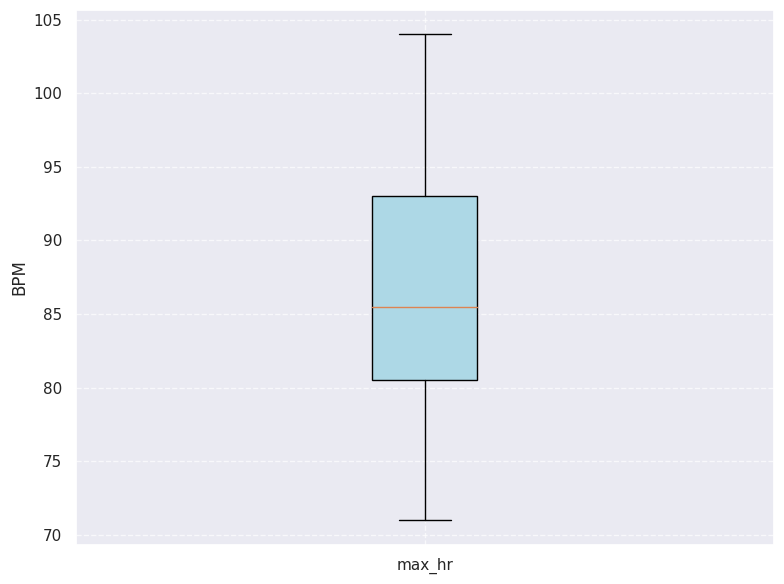

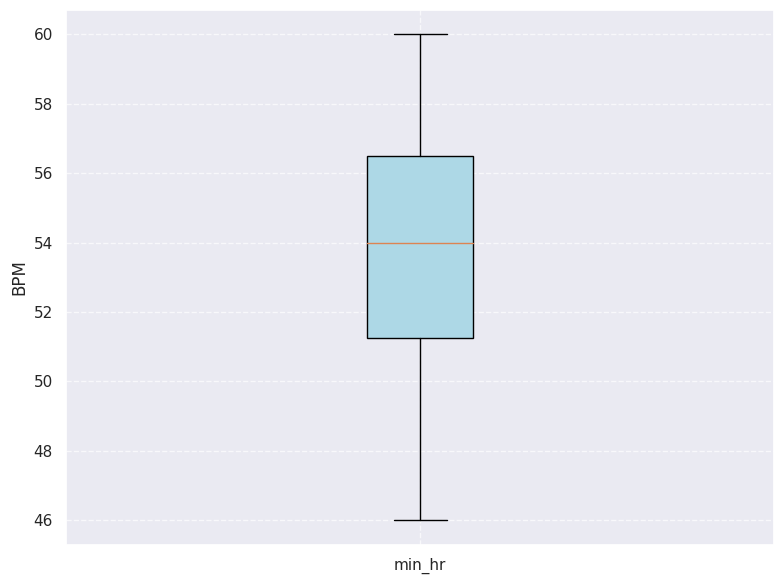

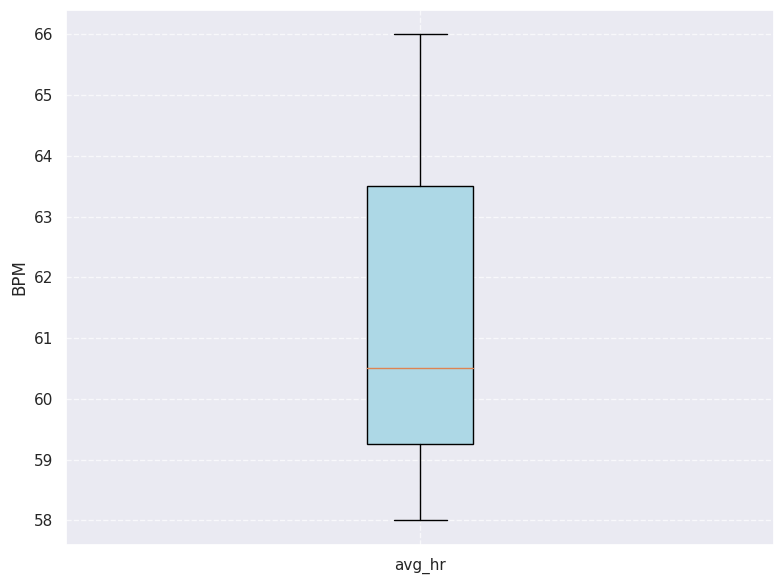

In [19]:
columns_to_plot = ['sleep_light_duration', 'total_duration', 'sleep_rem_duration', 'sleep_deep_duration',
                   'sleep_awake_duration', 'max_hr', 'min_hr', 'avg_hr']
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.boxplot(sleep_day[col], vert=True, patch_artist=True, boxprops={'facecolor': 'lightblue'}, showfliers=False)
    plt.ylabel('Minutes' if 'duration' in col else 'BPM' if 'hr' in col else '')  # Label the y-axis accordingly
    #plt.title(f'Box Plot of {col}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks([1], [col])  # Label the x-axis
    plt.tight_layout()
    plt.show()


#heart_rate_day

In [20]:
heart_rate_day=tables_dict["heart_rate_day"]
heart_rate_day = heart_rate_day[["time","value"]]
heart_rate_day['avg_hr'] = heart_rate_day['value'].apply(lambda x: json.loads(x).get('avg_hr'))
heart_rate_day['min_hr'] = heart_rate_day['value'].apply(lambda x: json.loads(x).get('min_hr'))
heart_rate_day['max_hr'] = heart_rate_day['value'].apply(lambda x: json.loads(x).get('max_hr'))
heart_rate_day = heart_rate_day.drop(columns=['value'])
heart_rate_day['time'] = pd.to_datetime(heart_rate_day['time'], unit='s')
heart_rate_day['time'] = pd.to_datetime(heart_rate_day['time'])
heart_rate_day['time'] = heart_rate_day['time'].dt.strftime('%Y-%m-%d')


<ipython-input-20-99ee51979f23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_rate_day['avg_hr'] = heart_rate_day['value'].apply(lambda x: json.loads(x).get('avg_hr'))
<ipython-input-20-99ee51979f23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_rate_day['min_hr'] = heart_rate_day['value'].apply(lambda x: json.loads(x).get('min_hr'))
<ipython-input-20-99ee51979f23>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [21]:
heart_rate_day

,time,avg_hr,min_hr,max_hr
0,2023-09-03,81,66,104
1,2023-09-04,85,54,135
2,2023-09-05,80,57,121
3,2023-09-06,75,60,108
4,2023-09-07,83,65,118
5,2023-09-08,74,54,106
6,2023-09-09,74,54,104
7,2023-09-10,73,51,129
8,2023-09-11,72,46,106
9,2023-09-12,76,52,106


##Exporting

In [22]:
f="Heart"
csv_filename = path + f +"_data.csv"
heart_rate_day.to_csv(csv_filename, index=False)
print(f"Exported {f} data to {csv_filename}")

Exported Heart data to /content/drive/MyDrive/WearablesData/DB/RedmiW/Features/Heart_data.csv


##Plotting

In [23]:
heart_rate_day

,time,avg_hr,min_hr,max_hr
0,2023-09-03,81,66,104
1,2023-09-04,85,54,135
2,2023-09-05,80,57,121
3,2023-09-06,75,60,108
4,2023-09-07,83,65,118
5,2023-09-08,74,54,106
6,2023-09-09,74,54,104
7,2023-09-10,73,51,129
8,2023-09-11,72,46,106
9,2023-09-12,76,52,106


In [24]:
heart_rate_day
#Remove zero values

heart_rate_day=heart_rate_day[(heart_rate_day['max_hr'] != 0) & (heart_rate_day['avg_hr'] != 0) & (heart_rate_day['min_hr'] != 0)]
max=heart_rate_day.max(axis=0) # will return max value of each column
min=heart_rate_day.min(axis=0) # will return max value of each column
mean = heart_rate_day.mean()

print("\n  \n")
print("\n  \n")
print("\n   ********** Maximum Values ********** \n", max)
print("\n   ********** Average Values ********** \n", mean)
print("\n   ********** Minumum Values ********** \n", min)
print("\n  \n")
print("\n  \n")



  


  


   ********** Maximum Values ********** 
 time      2023-09-13
avg_hr            85
min_hr            66
max_hr           135
dtype: object

   ********** Average Values ********** 
 avg_hr     76.636364
min_hr     55.272727
max_hr    113.272727
dtype: float64

   ********** Minumum Values ********** 
 time      2023-09-03
avg_hr            70
min_hr            46
max_hr           104
dtype: object

  


  



<ipython-input-24-b845907b98af>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = heart_rate_day.mean()


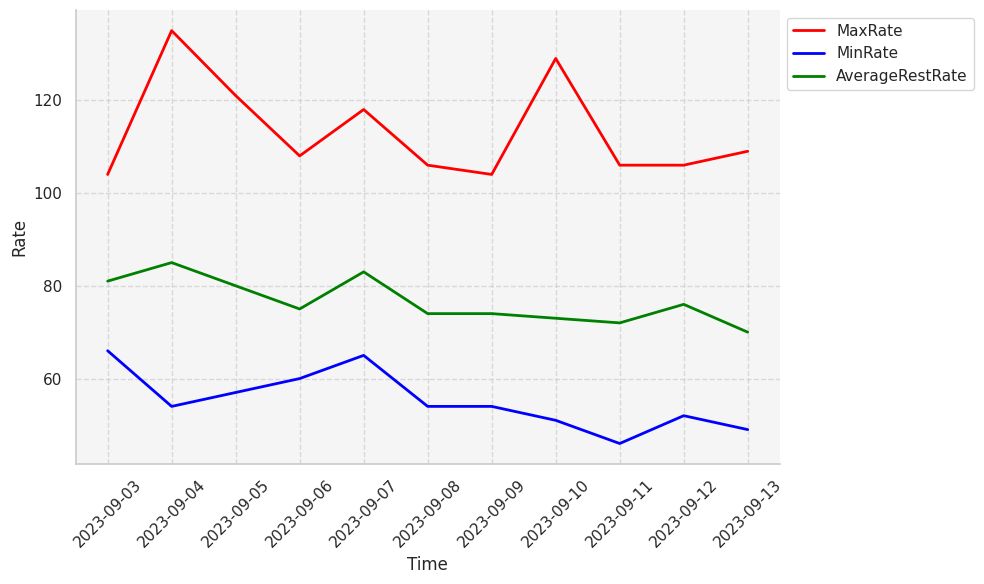

In [25]:
plot_rate_trends(heart_rate_day, plot_max=True, plot_min=True, plot_avg=True)


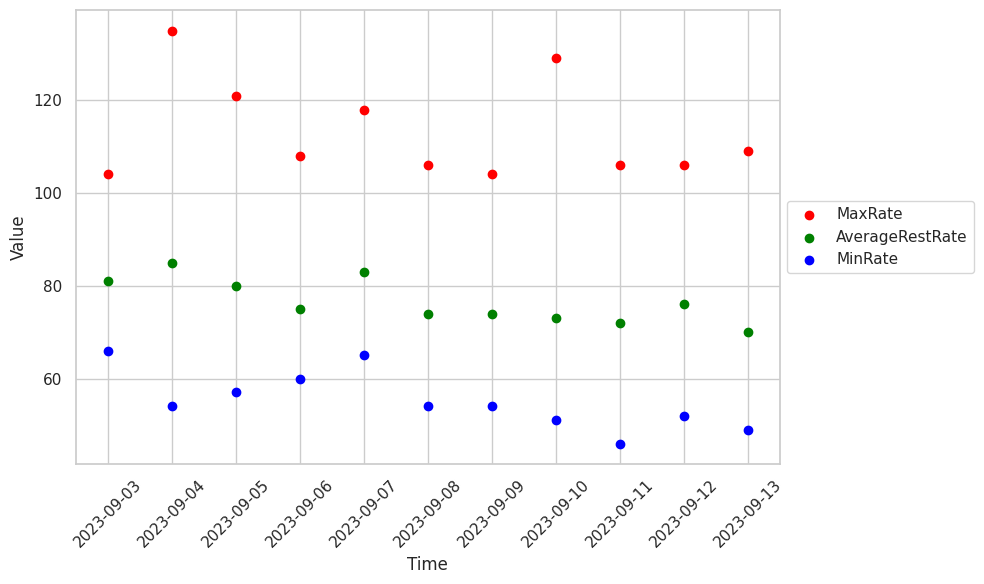

In [26]:
x_column = 'time'
y_columns = ['max_hr','avg_hr','min_hr']
colors = ['red', 'green','blue']
legend_labels = ['MaxRate', 'AverageRestRate','MinRate']
#title = 'Scatter Plot with Different Variables'
title=""
x_label = 'Time'
y_label = 'Value'
# Create the scatter plot using the function
heart_colored_scatter_plot(heart_rate_day, x_column, y_columns, colors, title, x_label, y_label, legend_labels)

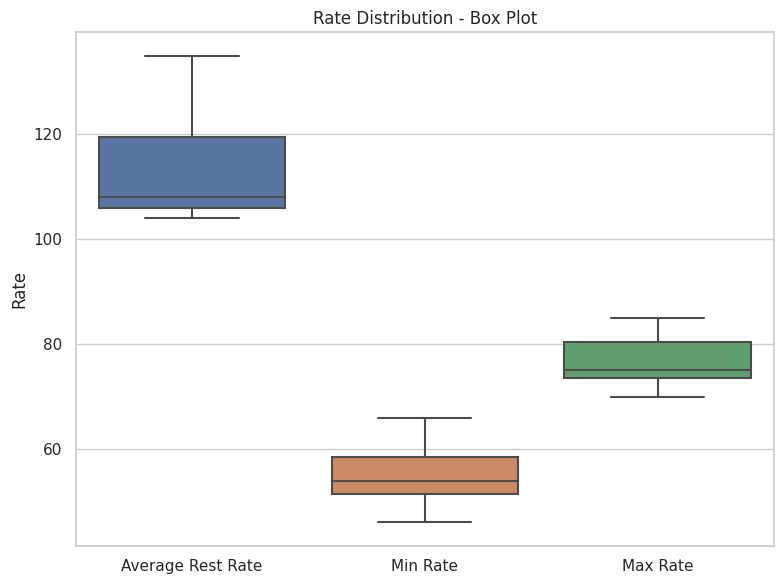

In [27]:
plot_box_plots_heart(heart_rate_day, plot_max=True, plot_min=True, plot_avg=True)

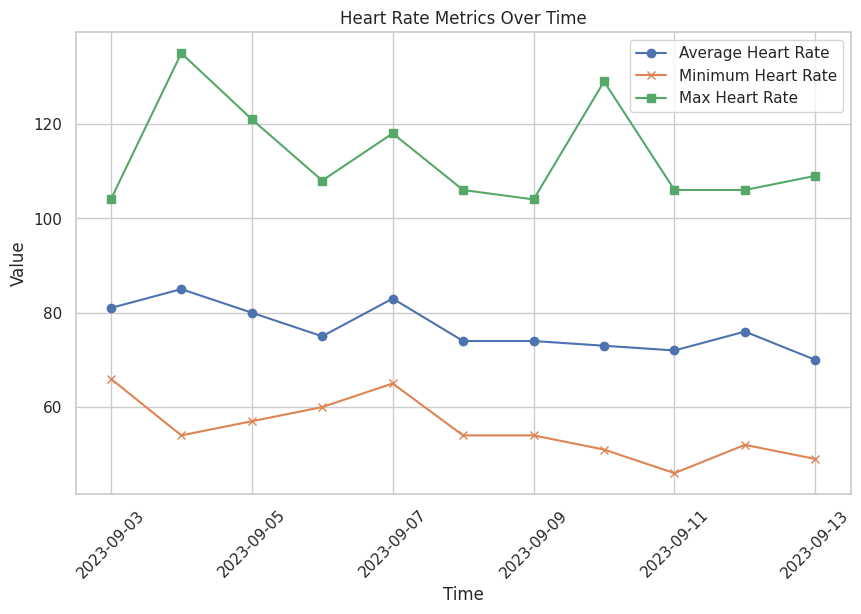

In [28]:
heart_rate_day['time'] = pd.to_datetime(heart_rate_day['time'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(heart_rate_day['time'], heart_rate_day['avg_hr'], label='Average Heart Rate', marker='o')
ax.plot(heart_rate_day['time'], heart_rate_day['min_hr'], label='Minimum Heart Rate', marker='x')
ax.plot(heart_rate_day['time'], heart_rate_day['max_hr'], label='Max Heart Rate ', marker='s')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Heart Rate Metrics Over Time')
plt.xticks(rotation=45)
ax.legend()
plt.show()

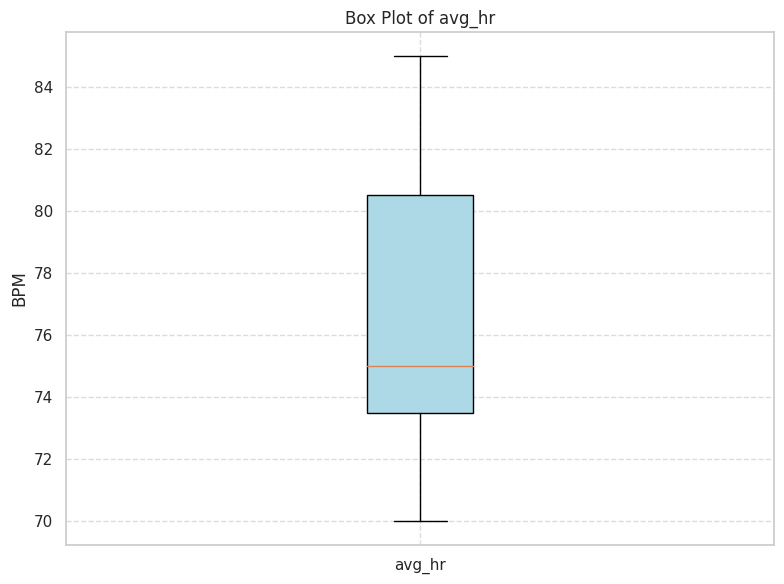

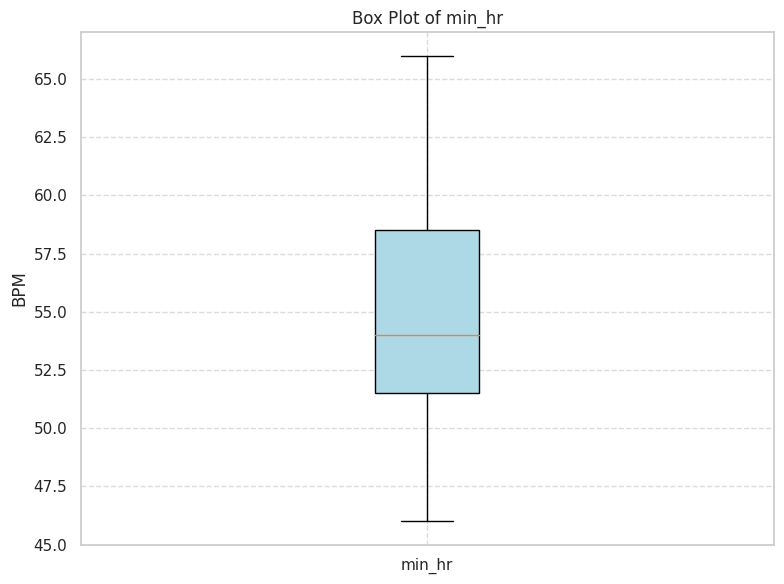

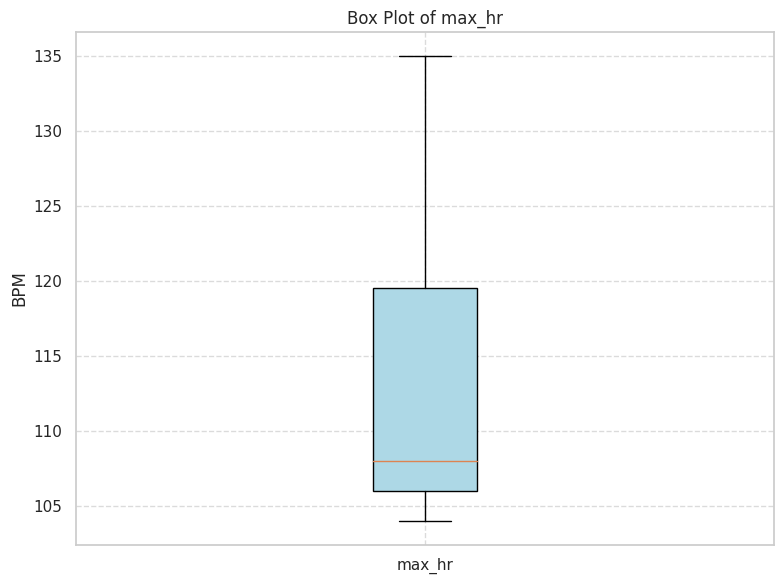

In [29]:
columns_to_plot = ['avg_hr', 'min_hr', 'max_hr']
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.boxplot(heart_rate_day[col], vert=True, patch_artist=True, boxprops={'facecolor': 'lightblue'}, showfliers=False)
    plt.ylabel('BPM')
    plt.title(f'Box Plot of {col}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks([1], [col])  # Label the x-axis
    plt.tight_layout()
    plt.show()

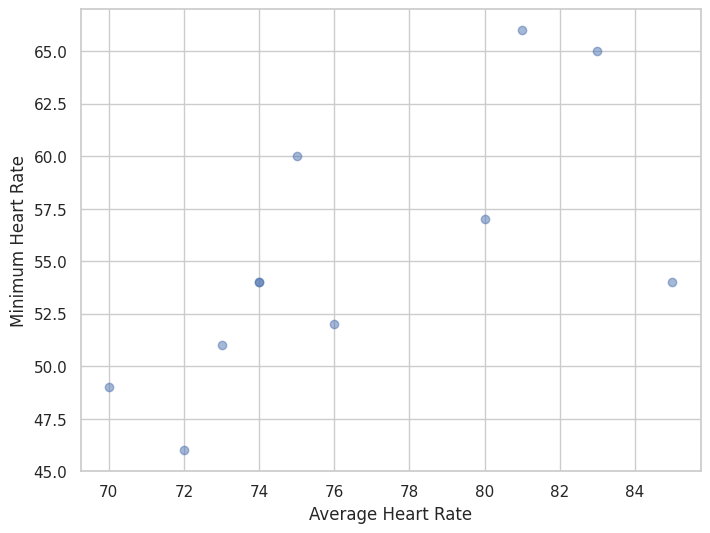

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(heart_rate_day['avg_hr'], heart_rate_day['min_hr'], marker='o', alpha=0.5)
plt.xlabel('Average Heart Rate')
plt.ylabel('Minimum Heart Rate')
#plt.title('Scatter Plot of Average vs. Minimum Heart Rate')
plt.grid(True)
plt.show()

#SpO2

In [31]:
spo2_day=tables_dict["spo2_day"]
spo2_day = spo2_day[["time","value"]]
print("The type is " , type(spo2_day))
print("The type is " , type(spo2_day['value']))
spo2_day['spo2'] = spo2_day['value'].apply(lambda x: json.loads(x).get('latest_spo2'))
spo2_day['spo2'] = spo2_day['spo2'].astype(str).apply(lambda x: eval(x).get('spo2'))
spo2_day = spo2_day.drop("value",axis=1)
spo2_day['time'] = pd.to_datetime(spo2_day['time'], unit='s')
spo2_day['time'] = pd.to_datetime(spo2_day['time'])
spo2_day['time'] = spo2_day['time'].dt.strftime('%Y-%m-%d')



The type is  <class 'pandas.core.frame.DataFrame'>
The type is  <class 'pandas.core.series.Series'>


<ipython-input-31-87ab94134a80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spo2_day['spo2'] = spo2_day['value'].apply(lambda x: json.loads(x).get('latest_spo2'))
<ipython-input-31-87ab94134a80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spo2_day['spo2'] = spo2_day['spo2'].astype(str).apply(lambda x: eval(x).get('spo2'))


##Exporting

In [32]:
f="SpO2"
csv_filename = path + f +"_data.csv"
spo2_day.to_csv(csv_filename, index=False)
print(f"Exported {f} data to {csv_filename}")

Exported SpO2 data to /content/drive/MyDrive/WearablesData/DB/RedmiW/Features/SpO2_data.csv


##Plotting

In [33]:
spo2_day

,time,spo2
0,2023-09-03,97
1,2023-09-04,97
2,2023-09-07,97
3,2023-09-06,98
4,2023-09-12,85
5,2023-09-10,93
6,2023-09-09,97
7,2023-09-08,97


In [34]:
spo2_day
#Remove zero values

max=spo2_day.max(axis=0) # will return max value of each column
min=spo2_day.min(axis=0) # will return max value of each column
mean = spo2_day.mean()

print("\n  \n")
print("\n  \n")
print("\n   ********** Maximum Values ********** \n", max)
print("\n   ********** Average Values ********** \n", mean)
print("\n   ********** Minumum Values ********** \n", min)
print("\n  \n")
print("\n  \n")



  


  


   ********** Maximum Values ********** 
 time    2023-09-12
spo2            98
dtype: object

   ********** Average Values ********** 
 spo2    95.125
dtype: float64

   ********** Minumum Values ********** 
 time    2023-09-03
spo2            85
dtype: object

  


  



<ipython-input-34-370c942158b2>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = spo2_day.mean()


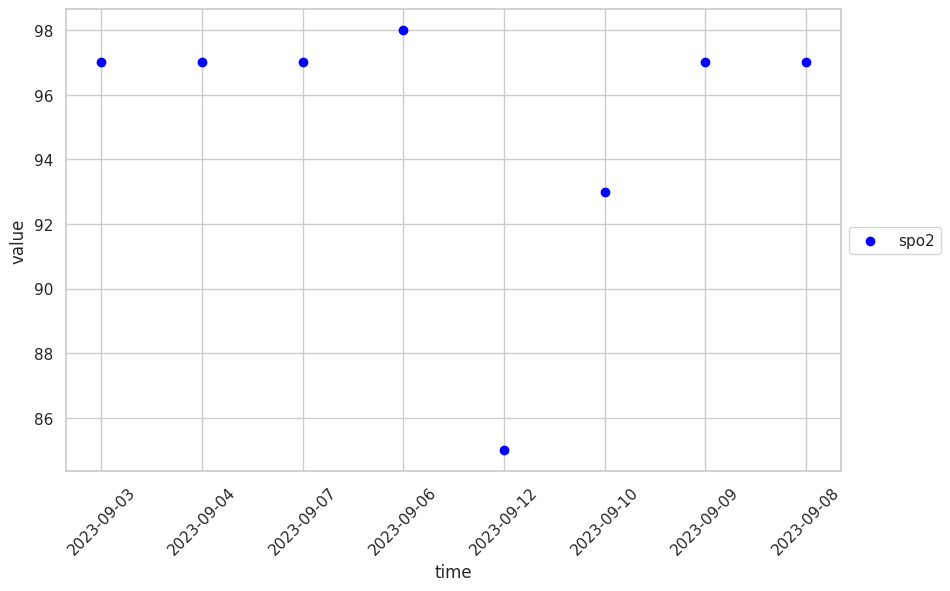

In [35]:

plt.figure(figsize=(10, 6))
plt.scatter(spo2_day['time'], spo2_day['spo2'], marker='o', color='blue')
plt.xlabel('time')
plt.ylabel('value')
legend_labels = ['spo2']

plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))  # Placing legend on the side

#plt.title('SpO2 Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



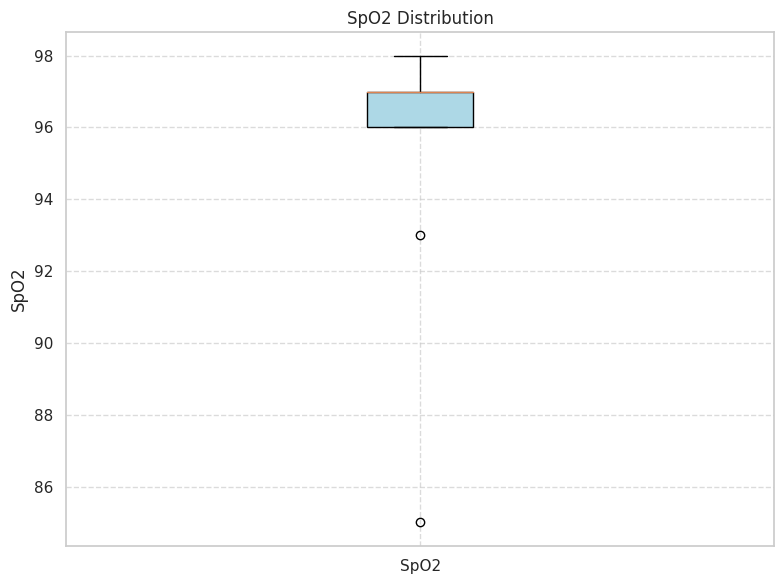

In [36]:

plt.figure(figsize=(8, 6))
plt.boxplot(spo2_day['spo2'], vert=True, patch_artist=True, boxprops={'facecolor': 'lightblue'})
plt.ylabel('SpO2')
plt.title('SpO2 Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([1], ['SpO2'])
plt.tight_layout()
plt.show()


#steps_day

In [37]:
steps_day=tables_dict["steps_day"]
steps_day = steps_day[["time","value"]]
steps_day['steps'] = steps_day['value'].apply(lambda x: json.loads(x).get('steps'))
steps_day['calories'] = steps_day['value'].apply(lambda x: json.loads(x).get('calories'))
steps_day = steps_day.drop(columns=['value'])
steps_day['time'] = pd.to_datetime(steps_day['time'], unit='s')
steps_day['time'] = pd.to_datetime(steps_day['time'])
steps_day['time'] = steps_day['time'].dt.strftime('%Y-%m-%d')

<ipython-input-37-965051963fe2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steps_day['steps'] = steps_day['value'].apply(lambda x: json.loads(x).get('steps'))
<ipython-input-37-965051963fe2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steps_day['calories'] = steps_day['value'].apply(lambda x: json.loads(x).get('calories'))


##Exporting

In [38]:
f="Activity"
csv_filename = path + f +"_data.csv"
steps_day.to_csv(csv_filename, index=False)
print(f"Exported {f} data to {csv_filename}")

Exported Activity data to /content/drive/MyDrive/WearablesData/DB/RedmiW/Features/Activity_data.csv


##Plotting

In [39]:
steps_day

,time,steps,calories
0,2023-09-03,1994,91
1,2023-09-04,8550,465
2,2023-09-06,3557,156
3,2023-09-05,8435,417
4,2023-09-07,2776,145
5,2023-09-09,4413,226
6,2023-09-08,3902,249
7,2023-09-10,4967,236
8,2023-09-11,5707,151
9,2023-09-12,7662,286


In [40]:
max=steps_day.max(axis=0) # will return max value of each column
min=steps_day.min(axis=0) # will return max value of each column
mean = steps_day.mean()

print("\n  \n")
print("\n  \n")
print("\n   ********** Maximum Values ********** \n", max)
print("\n   ********** Average Values ********** \n", mean)
print("\n   ********** Minumum Values ********** \n", min)
print("\n  \n")
print("\n  \n")


  


  


   ********** Maximum Values ********** 
 time        2023-09-13
steps             8550
calories           465
dtype: object

   ********** Average Values ********** 
 steps       4825.181818
calories     224.818182
dtype: float64

   ********** Minumum Values ********** 
 time        2023-09-03
steps             1114
calories            51
dtype: object

  


  



<ipython-input-40-3e5ca4b2b15d>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = steps_day.mean()


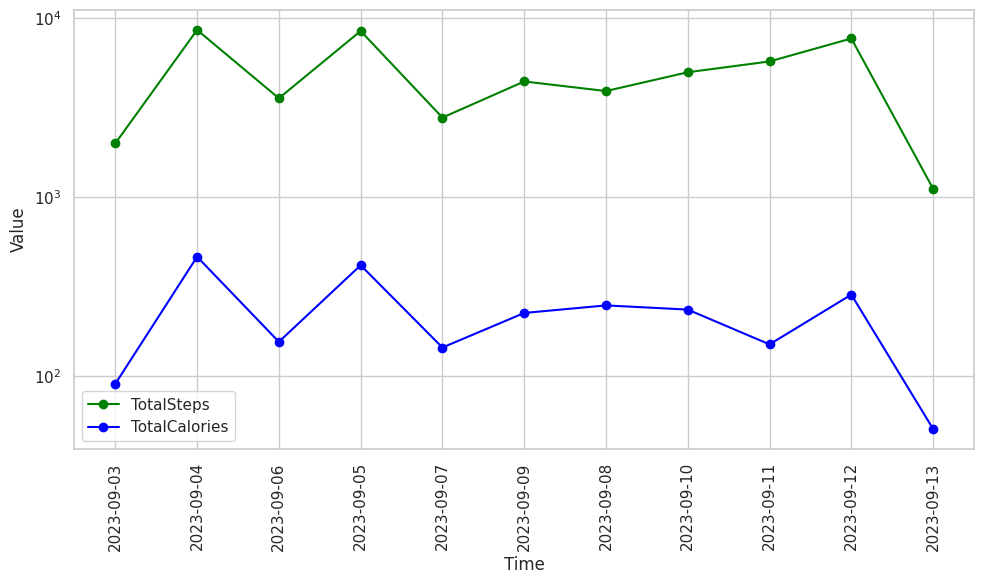

In [41]:
plot_time_series_activity(steps_day, plot_total_steps=True, plot_total_calories=True, log_scale=True)


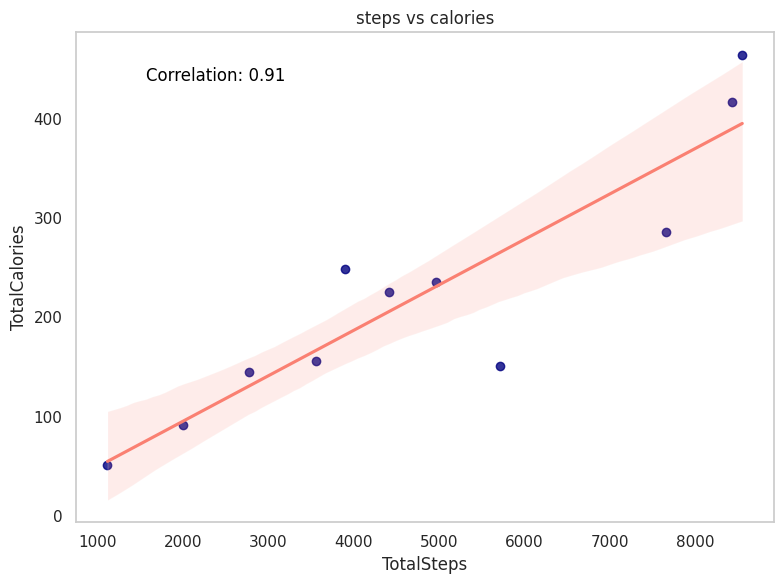

In [42]:
plot_scatter_with_regression(steps_day, x_column='steps', y_column='calories')

<ipython-input-6-f8457e6bc437>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_frame.loc[:, timestamp_col] = pd.to_datetime(data_frame.loc[:, timestamp_col])


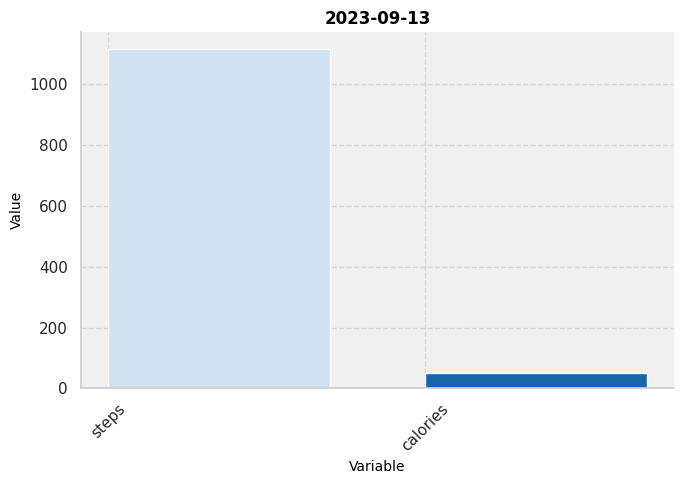

In [59]:
selected_date = pd.to_datetime('2023-09-13').date()  # Replace with the date you want to plot
variables_to_plot = ['steps', 'calories']
plot_variables_for_date(steps_day, timestamp_col='time', selected_date=selected_date, variables=variables_to_plot, log_scale=False)

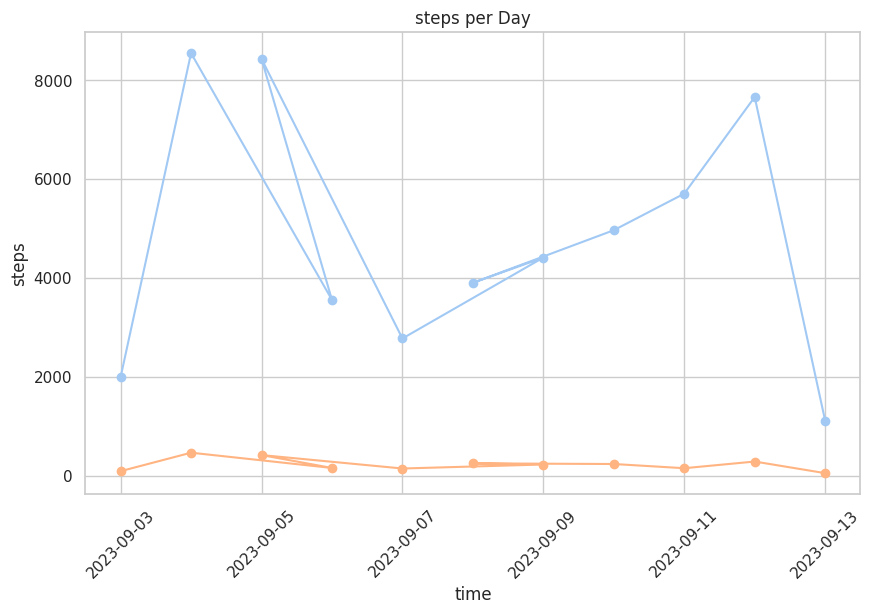

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(steps_day['time'], steps_day['steps'], marker='o', linestyle='-')
plt.plot(steps_day['time'], steps_day['calories'], marker='o', linestyle='-')
plt.xlabel('time')
plt.ylabel('steps')
plt.title('steps per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

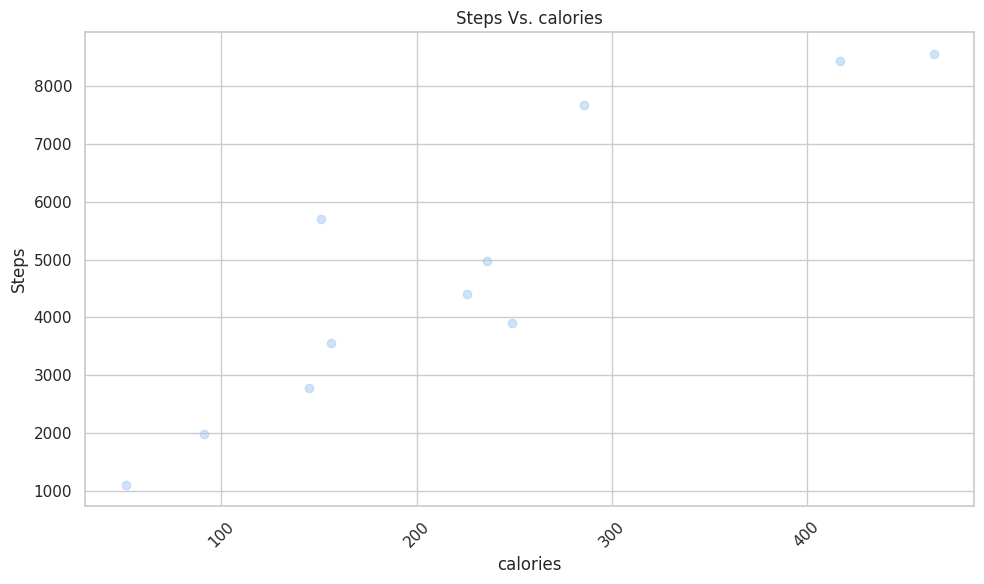

In [45]:

plt.figure(figsize=(10, 6))
plt.scatter(steps_day['calories'], steps_day['steps'], alpha=0.5)
plt.xlabel('calories')
plt.ylabel('Steps')
plt.title('Steps Vs. calories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


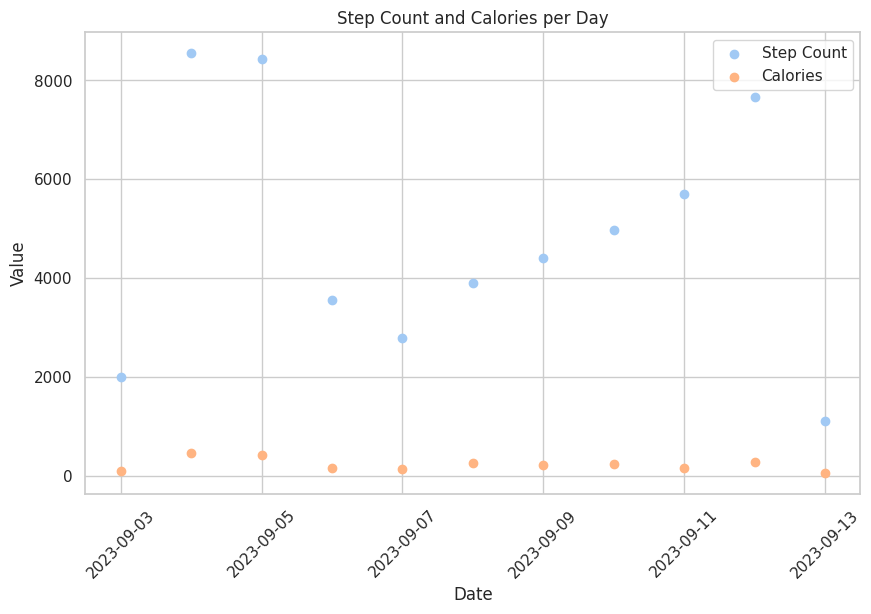

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(steps_day['time'], steps_day['steps'], label='Step Count', marker='o')
plt.scatter(steps_day['time'], steps_day['calories'], label='Calories', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Step Count and Calories per Day')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

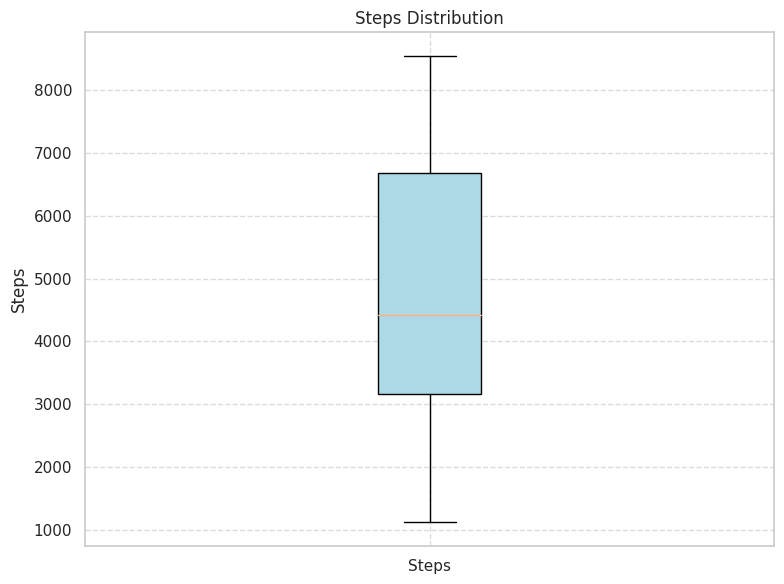

In [47]:

plt.figure(figsize=(8, 6))
plt.boxplot(steps_day['steps'], vert=True, patch_artist=True, boxprops={'facecolor': 'lightblue'})
plt.ylabel('Steps')
plt.title('Steps Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([1], ['Steps'])
plt.tight_layout()
plt.show()


#stress

In [48]:
stress=tables_dict["stress"]
stress = stress[["time","value"]]
stress['stress'] = stress['value'].apply(lambda x: json.loads(x).get('stress'))
stress = stress.drop(columns=['value'])
stress['time'] = pd.to_datetime(stress['time'], unit='s')
stress['time'] = pd.to_datetime(stress['time'])
stress['time'] = stress['time'].dt.strftime('%Y-%m-%d')

<ipython-input-48-85b58622db93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stress['stress'] = stress['value'].apply(lambda x: json.loads(x).get('stress'))


In [49]:
stress

,time,stress
0,2023-09-13,39
1,2023-09-13,33
2,2023-09-13,34
3,2023-09-13,39
4,2023-09-13,33
5,2023-09-13,34


In [50]:
#stress_values_RW3

#Remove zero values

#stress=stress[(stress['max_hr'] != 0) & (stress['avg_hr'] != 0) & (stress['min_hr'] != 0)]
max=stress.max(axis=0) # will return max value of each column
min=stress.min(axis=0) # will return max value of each column
mean = stress.mean()

print("\n  \n")
print("\n  \n")
print("\n   ********** Maximum Values ********** \n", max)
print("\n   ********** Average Values ********** \n", mean)
print("\n   ********** Minumum Values ********** \n", min)
print("\n  \n")
print("\n  \n")



  


  


   ********** Maximum Values ********** 
 time      2023-09-13
stress            39
dtype: object

   ********** Average Values ********** 
 stress    35.333333
dtype: float64

   ********** Minumum Values ********** 
 time      2023-09-13
stress            33
dtype: object

  


  



<ipython-input-50-978a732d4031>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = stress.mean()


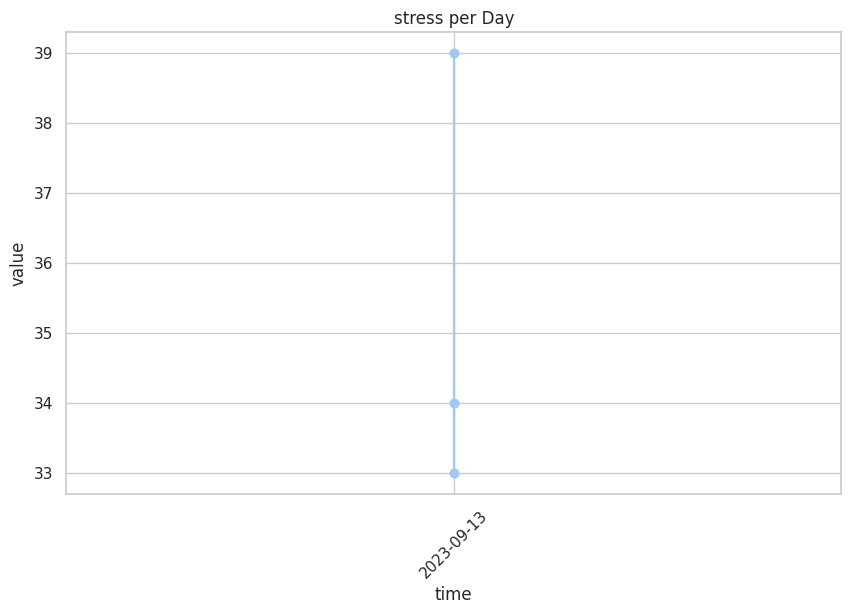

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(stress['time'], stress['stress'], marker='o', linestyle='-')
plt.xlabel('time')
plt.ylabel('value')
plt.title('stress per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

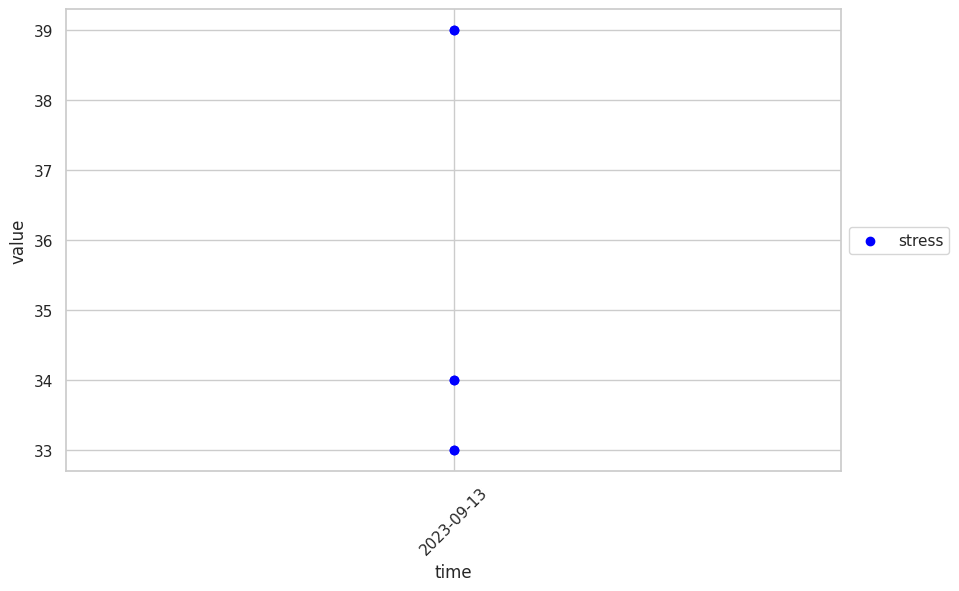

In [52]:

plt.figure(figsize=(10, 6))
plt.scatter(stress['time'], stress['stress'], marker='o', color='blue')
plt.xlabel('time')
plt.ylabel('value')
legend_labels = ['stress']

plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))  # Placing legend on the side

#plt.title('SpO2 Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [53]:
stress_day=tables_dict["stress_day"]
stress_day = stress_day[["time","value"]]
stress_day['avg_stress'] = stress_day['value'].apply(lambda x: json.loads(x).get('avg_stress'))
stress_day = stress_day.drop(columns=['value'])
stress_day['time'] = pd.to_datetime(stress_day['time'], unit='s')
stress_day['time'] = pd.to_datetime(stress_day['time'])
stress_day['time'] = stress_day['time'].dt.strftime('%Y-%m-%d')


<ipython-input-53-b9b590b08f96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stress_day['avg_stress'] = stress_day['value'].apply(lambda x: json.loads(x).get('avg_stress'))


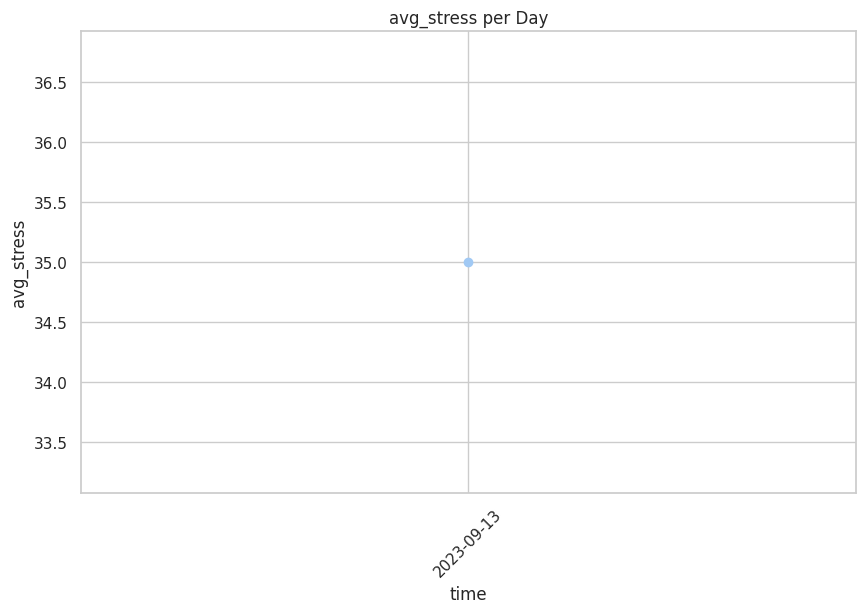

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(stress_day['time'], stress_day['avg_stress'], marker='o', linestyle='-')
plt.xlabel('time')
plt.ylabel('avg_stress')
plt.title('avg_stress per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#calories_day

In [55]:
Calories_day =tables_dict["calories_day"]
Calories_day = Calories_day[["time","value"]]
Calories_day['calories'] = Calories_day['value'].apply(lambda x: json.loads(x).get('calories'))
Calories_day = Calories_day.drop(columns=['value'])
Calories_day['time'] = pd.to_datetime(Calories_day['time'], unit='s')
Calories_day['time'] = pd.to_datetime(Calories_day['time'])
Calories_day['time'] = Calories_day['time'].dt.strftime('%Y-%m-%d')

<ipython-input-55-f05dcc843f65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Calories_day['calories'] = Calories_day['value'].apply(lambda x: json.loads(x).get('calories'))


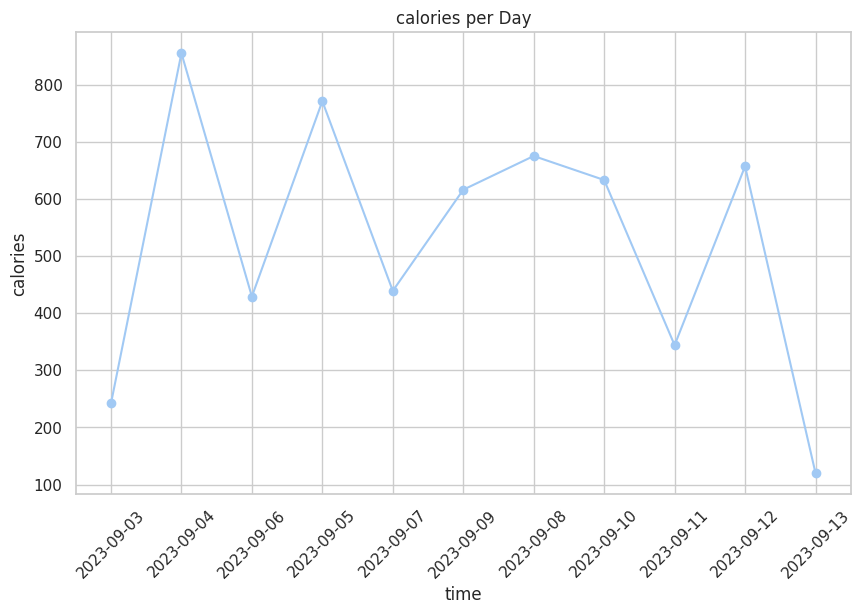

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(Calories_day['time'], Calories_day['calories'], marker='o', linestyle='-')
plt.xlabel('time')
plt.ylabel('calories')
plt.title('calories per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

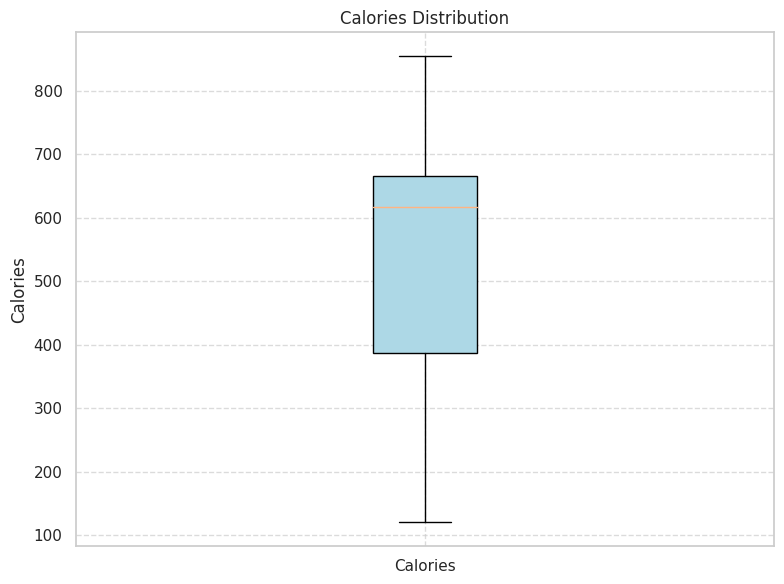

In [57]:
plt.figure(figsize=(8, 6))
plt.boxplot(Calories_day['calories'], vert=True, patch_artist=True, boxprops={'facecolor': 'lightblue'}, showfliers=False)
plt.ylabel('Calories')
plt.title('Calories Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([1], ['Calories'])  # Label the x-axis
plt.tight_layout()
plt.show()